In [1]:
import os
import asyncio
import time
import datetime

import pandas as pd
import pyodbc

from reclaim_tiktok.scrapping.scrapper import Scrapper
from TikTokApi import TikTokApi

import nest_asyncio
nest_asyncio.apply()

%load_ext autoreload
%autoreload 2

In [2]:
ms_token = "K6ycnFewW5yhPmBCFOe1PwyDvkXz_faFA6BMw8MmyxdRMxR2QpwiAZsNdHCps1nvHPJPn5R-PuJtlKImgAo08FYbRYLYBK4fL5YLnTtSd2I=" #os.environ.get("ms_token", None)


In [3]:
scrapper = Scrapper(ms_token=ms_token)

In [159]:
#load hashtags from csv
hashtags = pd.read_csv("data/classifier/hashtag_list_curated.csv")

In [160]:
hashtags["Hashtag"]

0                #afddeutschland
1                #mutzurwahrheit
2                 #zeitfürdieafd
3                #andreazuercher
4     #alternativefürdeutschland
5                #afdimbundestag
6                  #afdimlandtag
7                   #afdfraktion
8           #deutschlandzuerst🇩🇪
9                   #nurnochafd💙
10               #politikwechsel
11               #wirsinddasvolk
12          #afdwählenistnotwehr
13               #mutzurwahrheit
14                 #ampelmussweg
15              #dieampelmussweg
16               #wirsinddasvolk
17               #grüneneindanke
18            #seischlauwählblau
19           #regierungsversagen
20                #habeckmussweg
21                       #fckgrn
22             #jungealternative
23                  #aliceweidel
24         #seischlauwählblau💙💙💙
25            #seischlauwählblau
26                #scholzmussweg
27                   #afdwillwin
28                       #weidel
29          #dieregierungmussweg
30        

In [4]:
videos_test = []

In [5]:
videos_test = asyncio.run(scrapper.search_videos_by_hashtags(count=10000, hashtags=["afd"], videos=videos_test))

Searching for afd


In [167]:
# save to csv 
df.to_csv("data/tiktok_videos_duplicated_dropped.csv", index=False)

In [17]:
# load videos into a pandas dataframe
df = pd.DataFrame([video for video in df_raw_dict])
# save to csv before adding the columns and fitlering
df.to_csv("data/tiktok_videos_based_on_hashtags_raw_fetch.csv", index=False)

#drop duplicates
df = df.drop_duplicates(subset="id")


In [165]:
#drop duplicates
df = df.drop_duplicates(subset="id")


In [166]:
len(df)

8206

In [ ]:
videos_test

In [234]:
videos_test.append(videos_test[1])

In [235]:
len(videos_test)

392

In [236]:
seen_ids = set()
unique_videos = []
for video in videos_test:
    video = video.as_dict
    #print(video.as_dict)
    if video["id"] not in seen_ids:
        unique_videos.append(video)
        seen_ids.add(video["id"])


In [237]:
len(unique_videos)

391

## Load to pandas dataframe

In [167]:
# load videos into a pandas dataframe
# df = pd.DataFrame([video for video in df])
# # save to csv before adding the columns and fitlering
# df.to_csv("data/tiktok_videos_based_on_hashtags_raw_fetch_III.csv", index=False)

# #drop duplicates
# df = df.drop_duplicates(subset="id")

# Define a function to safely extract 'duration' from each dictionary in the 'video' column
def extract_duration(video_info):
    # Check if 'duration' is a key in the dictionary and return its value if it exists
    return video_info.get('duration') if isinstance(video_info, dict) and 'duration' in video_info else None

# Apply this function to each element of the 'video' column to create the 'video_duration' column
df["video_duration"] = df["video"].apply(extract_duration)

# check for none values in video_duration
df["video_duration"].isna().sum()


# add columns to df
df["video_id"] = df["id"]
# convert createTime to datetime
df["video_timestamp"] = pd.to_datetime(df["createTime"], unit="s")
df["video_diggcount"] = df["statsV2"].apply(lambda x: int(x["diggCount"]))
df["video_sharecount"] = df["statsV2"].apply(lambda x: int(x["shareCount"]))
df["video_commentcount"] = df["statsV2"].apply(lambda x: int(x["commentCount"]))
df["video_playcount"] = df["statsV2"].apply(lambda x: int(x["playCount"]))
df["video_description"] = df["desc"]
df["video_is_ad"] = df["isAd"]
df["author_username"] = df["author"].apply(lambda x: x["uniqueId"])
df["author_name"] = df["author"].apply(lambda x: x["nickname"])
df["author_id"]= df["author"].apply(lambda x: x["id"])
df["author_followercount"] = df["authorStats"].apply(lambda x: x["followerCount"])
df["author_followingcount"] = df["authorStats"].apply(lambda x: x["followingCount"])
df["author_heartcount"] = df["authorStats"].apply(lambda x: x["heart"])
df["author_videocount"] = df["authorStats"].apply(lambda x: x["videoCount"])
df["author_diggcount"] = df["authorStats"].apply(lambda x: x["diggCount"])
df["author_verified"] = df["author"].apply(lambda x: x["verified"])
# extract suggested words if they exist -> sometime textExtra is empty and of type float
df["suggested_words"] = df["textExtra"].apply(lambda x: [word["hashtagName"] for word in x] if isinstance(x, list) else None)
df["url"] = df.apply(lambda x: f"https://www.tiktok.com/@{x['author']['uniqueId']}/video/{x['id']}", axis=1)
# add music id df["music"].iloc[0]["id"]
df["sound_id"] = df["music"].apply(lambda x: x["id"] if isinstance(x, dict) else None)

# remove all other columns
df = df[["video_id", "video_timestamp", "video_duration", "video_diggcount", "video_sharecount", "video_commentcount", "video_playcount", "video_description", "video_is_ad", "author_username", "author_name", "author_id", "author_followercount", "author_followingcount", "author_heartcount", "author_videocount", "author_diggcount", "author_verified", "suggested_words", "url", "sound_id", "music"]]



In [168]:
len(df)

8206

In [262]:
['id', 'timestamp_upload', 'timestamp_db', 'duration', 'digg_count', 'share_count', 'comment_count', 'play_count', 'description', 'is_ad', 'author_id', 'suggested_words', 'url', 'transcript_en', 'transcript_de', 'sound_id']

5006

<Axes: >

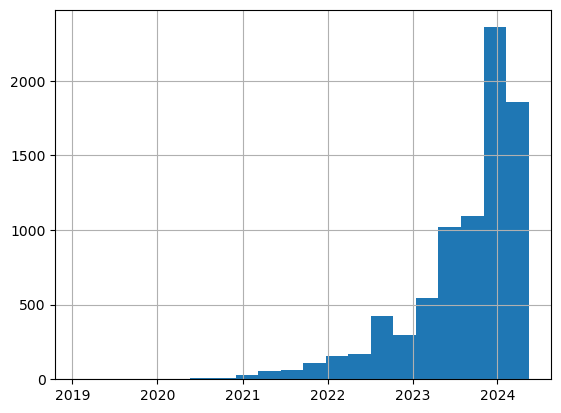

In [169]:
# plot time distribution ensure x axis is readable
df["video_timestamp"].hist(bins=20)

In [170]:
# sort by playCount
df.sort_values("video_playcount", ascending=False, inplace=True)

df.head()

,video_id,video_timestamp,video_duration,video_diggcount,video_sharecount,video_commentcount,video_playcount,video_description,video_is_ad,author_username,...,author_followercount,author_followingcount,author_heartcount,author_videocount,author_diggcount,author_verified,suggested_words,url,sound_id,music
9291,7261354386880810266,2023-07-29 21:23:42,24,768338,101300,11356,10589842,#weidel #aliceweideledit #scholz #clown #afd,False,mutzudeutschland,...,42700,3,819600,9,7,False,"[weidel, aliceweideledit, scholz, clown, afd]",https://www.tiktok.com/@mutzudeutschland/video...,7261354324231850779,"{'album': '', 'authorName': 'MutzuDeutschland'..."
8655,7253499104427248923,2023-07-08 17:21:11,85,963602,100531,26455,10292817,Was sagst du dazu? 🧐 #scholzmussweg #diegrünen...,False,tonithielemarketing,...,208500,14,3400000,361,288,False,"[scholzmussweg, diegrünenmüssenweg, dieregieru...",https://www.tiktok.com/@tonithielemarketing/vi...,6833934234948732941,"{'album': '', 'authorName': 'Kina', 'coverLarg..."
5000,7318212032979864865,2023-12-30 02:43:52,21,259219,11339,6485,7776794,Was haltet ihr davon? #streik 8.1.2024 #gener...,False,derletztepeter,...,43500,4928,825900,654,29200,False,"[streik, generalstreik, bauernproteste, dieamp...",https://www.tiktok.com/@derletztepeter/video/7...,6783821122023475202,"{'album': 'Ab geht die Post', 'authorName': 'D..."
4617,7320578484609256736,2024-01-05 11:43:28,69,196177,68661,9386,6522257,Seit ihr dabei beim streik #streiken #streik81...,False,zeitzeugengenausdemkrieg,...,57700,49,738600,190,488,False,"[streiken, streik8124, bauernstreik, ampelstre...",https://www.tiktok.com/@zeitzeugengenausdemkri...,7320578513001909024,"{'album': '', 'authorName': 'zeitzeugengenausd..."
0,7347405572540599584,2024-03-17 18:46:16,14,374911,15695,14908,6246422,#путинвор #путинхуйло #пропаганда #кремль #put...,False,kukla4242,...,40400,413,1100000,196,81,False,"[путинвор, путинхуйло, пропаганда, кремль, put...",https://www.tiktok.com/@kukla4242/video/734740...,7347405597551463201,"{'album': '', 'authorName': 'kukla 4242', 'cov..."


In [171]:
# save to csv
df.to_csv("data/tiktok_videos_based_on_hashtags_cleaned_II.csv", index=False)

# Load to DB

### Connect to db

In [240]:

server = 'tcp:sql-server-tiktok.database.windows.net'
database = 'azure-sql-db'
username = ''
password = ''
driver='/opt/homebrew/lib/libmsodbcsql.18.dylib' #'{ODBC Driver 17 for SQL Server}'

connection_str = f"Driver={driver};Server={server},1433;Database={database};Uid={username};Pwd={password};Encrypt=yes;TrustServerCertificate=no;Connection Timeout=30;"


In [242]:
cnxn = pyodbc.connect(connection_str)
cursor = cnxn.cursor()

## Add users to users table

In [ ]:
def add_users_to_db(processed_videos, connection_str):
    with pyodbc.connect(connection_str) as cnxn:
        cursor = cnxn.cursor()

        # Make sure only new users get added to the db
        # Get all unique author ids from the processed videos
        unique_author_ids = {video["author_id"] for video in processed_videos}
        
        # Get all unique author ids from the SQL database
        cursor.execute("SELECT id FROM dbo.Users")
        unique_author_ids_sql = {row[0] for row in cursor.fetchall()}

        # Determine which author ids need to be added
        unique_author_ids_to_add = unique_author_ids - unique_author_ids_sql
        
        # Filter authors to add
        authors_to_add = [video for video in processed_videos if video["author_id"] in unique_author_ids_to_add]
        print("Number of new users to be added to database",len(users_to_add))

        # Add authors to SQL database
        for author in authors_to_add:
            query = """
            INSERT INTO dbo.Users
            (id, unique_name_id, nickname, follower_count, following_count, heart_count, video_count, digg_count, verified)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
            """
            data = (
                int(author['author_id']),
                str(author['author_username']),
                str(author['author_name']),
                int(author['author_followercount']),
                int(author['author_followingcount']),
                int(author['author_heartcount']),
                int(author['author_videocount']),
                int(author['author_diggcount']),
                bool(author['author_verified']),
            )
            cursor.execute(query, data)
        cnxn.commit()

# Call the function to add users
add_users_to_db(processed_videos, connection_str)


In [174]:
# print all column names of Videos db
cursor.execute("SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = N'Users'")
columns = cursor.fetchall()
for column in columns:
    print(column[0])

id
follower_count
following_count
heart_count
video_count
digg_count
verified
nickname
unique_name_id


In [ ]:
# #  add users to sql database (dbo.Users) with the following schema ['id', 'unique_name_id', 'nickname', 'follower_count', 'following_count', 'heart_count', 'video_count', 'digg_count', 'verified']


# with pyodbc.connect(connection_str) as cnxn:
#     cursor = cnxn.cursor()

#     print("len df", len(df))
#     # get all unique author ids
#     unique_author_ids = df["author_id"].unique()

#     print("len unique_author_ids", unique_author_ids.shape[0])

#     # get all unique author ids from sql database

#     cursor.execute("SELECT id FROM dbo.Users")
#     unique_author_ids_sql = cursor.fetchall()
#     unique_author_ids_sql = [id[0] for id in unique_author_ids_sql]

#     # convert unique_author_ids_sql to strings instead of ints
#     unique_author_ids_sql = [str(id) for id in unique_author_ids_sql]

#     print("len unique_author_ids_sql", len(unique_author_ids_sql))

#     # get all unique author ids that are not in the sql database
#     unique_author_ids_to_add = set(unique_author_ids) - set(unique_author_ids_sql)

#     print("len unique_author_ids_to_add", len(unique_author_ids_to_add))

#     # get all authors that are not in the sql database based on set object
#     authors_to_add = df[df["author_id"].apply(lambda x: x in unique_author_ids_to_add)]

#     # remove duplicates by author
#     authors_to_add = authors_to_add.drop_duplicates(subset="author_id")

#     print("len authors_to_add", len(authors_to_add))

    

#     # add authors to sql database
#     for i in range(0, len(authors_to_add)):
#         author = authors_to_add.iloc[i]
#         # Prepare the SQL query using placeholders
#         query = """
#         INSERT INTO dbo.Users
#         (id, unique_name_id, nickname, follower_count, following_count, heart_count, video_count, digg_count, verified)
#         VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
#         """

#         data = (
#             int(author['author_id']),
#             str(author['author_username']),
#             str(author['author_name']),
#             int(author['author_followercount']),
#             int(author['author_followingcount']),
#             int(author['author_heartcount']),
#             int(author['author_videocount']),
#             int(author['author_diggcount']),
#             bool(author['author_verified']),
#         )
        
#         print(data)
#         # print final query with data 
#         #print(f"INSERT INTO dbo.Users (id, unique_name_id, nickname, follower_count, following_count, heart_count, video_count, digg_count, verified) VALUES ({int(author['author_id'])}, {str(author['author_username'])}, {str(author['author_name'])}, {int(author['author_followercount'])}, {int(author['author_followingcount'])}, {int(author['author_heartcount'])}, {int(author['author_videocount'])}, {int(author['author_diggcount'])}, {bool(author['author_verified'])})")

#         cursor.execute(query, data)
#         #cnxn.commit()


## Add sounds to sounds table

Get all column names of sounds table

In [176]:
# print all column names of Videos db
cursor.execute("SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = N'Sounds'")
columns = cursor.fetchall()
for column in columns:
    print(column[0])

id
title
original_sound
album
author_name
url


Insert Operations

In [254]:
def add_sounds_to_db(processed_videos, connection_str):
    with pyodbc.connect(connection_str) as cnxn:
        cursor = cnxn.cursor()

        # Get all unique sound ids from the processed videos
        unique_sound_ids = {video["sound_id"] for video in processed_videos if video["sound_id"]}

        # Get all unique sound ids from the SQL database
        cursor.execute("SELECT id FROM dbo.Sounds")
        unique_sound_ids_sql = {row[0] for row in cursor.fetchall()}

        # Determine which sound ids need to be added
        unique_sound_ids_to_add = unique_sound_ids - unique_sound_ids_sql

        # Filter sounds to add
        sounds_to_add = [video for video in processed_videos if video["sound_id"] in unique_sound_ids_to_add]

        print("Number of new sounds to be added to database",len(sounds_to_add))
        
        # Add sounds to SQL database
        for sound in sounds_to_add:
            query = """
            INSERT INTO dbo.Sounds 
            (id, title, original_sound, album, author_name, url)
            VALUES (?, ?, ?, ?, ?, ?)
            """
            title = str(sound['music']['title']).strip().replace(" ", "-")
            url = f"https://www.tiktok.com/music/{title}-{sound['sound_id']}"
            data = (
                int(sound['sound_id']), 
                str(sound['music']['title']),
                bool(sound['music']['original']),
                str(sound['music']['album']),
                str(sound['music']['authorName']),
                url,
            )
            cursor.execute(query, data)
        cnxn.commit()

# Call the function to add sounds
add_sounds_to_db(processed_videos, connection_str)


201


In [177]:
# # add sounds to sql database (dbo.Sounds) with the following schema ['id', 'title', 'play_url', 'author_name', 'author_id', 'video_count', 'use_count']

# with pyodbc.connect(connection_str) as cnxn:
#     cursor = cnxn.cursor()

#     # get all unique sound ids
#     unique_sound_ids = df["sound_id"].unique()

#     print("len unique_sound_ids", unique_sound_ids.shape[0])

#     # get all unique sound ids from sql database
#     cursor.execute("SELECT id FROM dbo.Sounds")
#     unique_sound_ids_sql = cursor.fetchall()
#     unique_sound_ids_sql = [id[0] for id in unique_sound_ids_sql]

#     print("len unique_sound_ids_sql", len(unique_sound_ids_sql))

#     # convert unique_sound_ids_sql to strings instead of ints
#     unique_sound_ids_sql = [str(id) for id in unique_sound_ids_sql]

#     # get all unique sound ids that are not in the sql database
#     unique_sound_ids_to_add = set(unique_sound_ids) - set(unique_sound_ids_sql)

#     # get all sounds that are not in the sql database based on set object
#     sounds_to_add = df[df["sound_id"].apply(lambda x: x in unique_sound_ids_to_add)]
    
#     # remove duplicates by sound
#     sounds_to_add = sounds_to_add.drop_duplicates(subset="sound_id")

#     print("len sounds_to_add", len(sounds_to_add))

#     # remove rows with empty sound_ids ""
#     sounds_to_add = sounds_to_add[sounds_to_add["sound_id"] != ""]

#     print("len sounds_to_add", len(sounds_to_add))


#     # add sounds to sql database
#     for i in range(0, len(sounds_to_add)):
#         sound = sounds_to_add.iloc[i]

#         title = str(sound['music']['title']).strip().replace(" ", "-")

#         url = f"https://www.tiktok.com/music/{title}-{sound['sound_id']}"
#         # Prepare the SQL query using placeholders
#         query = """
#         INSERT INTO dbo.Sounds 
#         (id, title, original_sound, album, author_name, url)
#         VALUES (?, ?, ?, ?, ?, ?)
#         """

#         data = (
#         int(sound['sound_id']), 
#         str(sound['music']['title']),
#         bool(sound['music']['original']),
#         str(sound['music']['album']),
#         str(sound['music']['authorName']),
#         url,
#         )
        

#         # Execute the query with the data tuple
#         cursor.execute(query, data)

len unique_sound_ids 6585
len unique_sound_ids_sql 4035
len sounds_to_add 2855
len sounds_to_add 2854


## Add videos to videos table

Get all column names of videos table

In [179]:
# print all column names of Videos db
cursor.execute("SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = N'Videos'")
columns = cursor.fetchall()
for column in columns:
    print(column[0])

id
timestamp_upload
timestamp_db
duration
digg_count
share_count
comment_count
play_count
description
is_ad
author_id
suggested_words
url
transcript_en
transcript_de
sound_id
removed
has_transcript
no_transcript_reason


In [255]:
def add_videos_to_db(processed_videos, connection_str):
    with pyodbc.connect(connection_str) as cnxn:
        cursor = cnxn.cursor()

        # Get all unique video ids from the SQL database
        cursor.execute("SELECT id FROM dbo.Videos")
        unique_video_ids_sql = {row[0] for row in cursor.fetchall()}

        # Determine which video ids need to be added
        unique_video_ids_to_add = {video["video_id"] for video in processed_videos} - unique_video_ids_sql

        # Filter videos to add
        videos_to_add = [video for video in processed_videos if video["video_id"] in unique_video_ids_to_add]
        
        print("Number of new videos to be added to database",len(videos_to_add))

        # Add videos to SQL database
        for video in videos_to_add:
            query = """
            INSERT INTO dbo.Videos 
            (id, timestamp_upload, timestamp_db, duration, digg_count, share_count, comment_count, play_count, description, is_ad, author_id, suggested_words, url, transcript_en, transcript_de, sound_id, removed, has_transcript, no_transcript_reason, core_messages_de) 
            VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
            """
            data = (
                int(video['video_id']), 
                video['video_timestamp'],
                datetime.fromtimestamp(time.time()),  # Current time as datetime
                float(video['video_duration']),
                int(video['video_diggcount']),
                int(video['video_sharecount']),
                int(video['video_commentcount']),
                int(video['video_playcount']),
                str(video['video_description']),
                bool(video['video_is_ad']),
                int(video['author_id']),
                str(video['suggested_words']),
                str(video['url']),
                None,
                None,
                int(video['sound_id']) if video['sound_id'] else None,
                False,
                None,
                None,
                None,
            )
            cursor.execute(query, data)
        cnxn.commit()

# Call the function to add videos
add_videos_to_db(processed_videos, connection_str)


Number of new videos to be added to database 236


In [190]:
# with pyodbc.connect(connection_str) as cnxn:
#     cursor = cnxn.cursor()

#     # remove duplicate videos and do not upload videos twice
#     df = df.drop_duplicates(subset="video_id")
#     print("len df", len(df))

#     # get all unique video ids from sql database
#     cursor.execute("SELECT id FROM dbo.Videos")
#     unique_video_ids_sql = cursor.fetchall()
#     unique_video_ids_sql = [id[0] for id in unique_video_ids_sql]
#     print("len unique_video_ids_sql", len(unique_video_ids_sql))

#     # convert to string
#     unique_video_ids_sql = [str(id) for id in unique_video_ids_sql]
    
#     # get all unique video ids that are not in the sql database
#     unique_video_ids_to_add = set(df["video_id"].unique()) - set(unique_video_ids_sql)
#     print("len unique_video_ids_to_add", len(unique_video_ids_to_add))

#     # get all videos that are not in the sql database based on set object
#     videos_to_add = df[df["video_id"].apply(lambda x: x in unique_video_ids_to_add)]
#     print("len videos_to_add", len(videos_to_add))

#     print(videos_to_add.shape[0])

#     for i in range(0, len(videos_to_add)):
#         video = videos_to_add.iloc[i]
#         # Prepare the SQL query using placeholders
#         query = """
#         INSERT INTO dbo.Videos 
#         (id, timestamp_upload, timestamp_db, duration, digg_count, share_count, comment_count, play_count, description, is_ad, author_id, suggested_words, url, transcript_en, transcript_de, sound_id, removed, has_transcript, no_transcript_reason) 
#         VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
#         """

#         data = (
#         int(video['video_id']), 
#         # convert pandas timestamp to datetime
#         pd.Timestamp(video['video_timestamp']).to_pydatetime(),
#         datetime.datetime.fromtimestamp(time.time()),  # Current time as datetime
#         float(video['video_duration']),
#         int(video['video_diggcount']),
#         int(video['video_sharecount']),
#         int(video['video_commentcount']),
#         int(video['video_playcount']),
#         str(video['video_description']),
#         bool(video['video_is_ad']),
#         int(video['author_id']),
#         str(video['suggested_words']),
#         str(video['url']),
#         None,
#         None,
#         int(video['sound_id']) if video['sound_id']!= "" else None,
#         False,
#         None,
#         None,
#         )
        
#         #print(data)

#         # Execute the query with the data tuple
#         cursor.execute(query, data)
#     cnxn.commit()


len df 8206
len unique_video_ids_sql 5006
len unique_video_ids_to_add 3617
len videos_to_add 3617
3617


In [191]:
# get SELECT * FROM [dbo].[Videos] WHERE transcript_en IS NULL;
cursor.execute("SELECT * FROM [dbo].[Videos] WHERE transcript_en IS NULL")
videos = cursor.fetchall()
print(len(videos))

8623
